In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import seaborn as sns
import warnings

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.layers import Conv2D
from keras.regularizers import l2

In [2]:
dataset= pd.read_csv('Air Quality Benchmark dataset.csv')

In [3]:
dataset.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [4]:
dataset.tail()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230692,2020-02-28 18:29:47,Alt Bornheim Feinstaub,3.05,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Time_stamp           1230693 non-null  object 
 1   boxName              1230693 non-null  object 
 2   PM 2.5               1230693 non-null  float64
 3   temp                 1230693 non-null  float64
 4   pressure             1230693 non-null  int64  
 5   humidity             1230693 non-null  int64  
 6   wind_speed           1230693 non-null  float64
 7   Time of Day          1230693 non-null  object 
 8   Peak/NoPeak          1230693 non-null  object 
 9   Day                  1230693 non-null  object 
 10  Week Day             1230693 non-null  object 
 11  Weather              1230693 non-null  object 
 12  Weather Description  1230693 non-null  object 
 13  label                1230693 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1

In [31]:
dataset.columns

Index(['Time_stamp', 'boxName', 'PM 2.5', 'temp', 'pressure', 'humidity',
       'wind_speed', 'Peak/NoPeak', 'Day', 'Weather Description'],
      dtype='object')

In [6]:
target = dataset['label']
dataset.drop("label",axis=1, inplace=True)  
variables = dataset

In [7]:
variables.drop("Week Day",axis=1, inplace=True)
variables.drop("Weather",axis=1, inplace=True)
variables.drop("Time of Day",axis=1, inplace=True)

In [8]:
variables.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Peak/NoPeak,Day,Weather Description
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Peak,Monday,broken clouds
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Peak,Monday,broken clouds
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Peak,Monday,broken clouds
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Peak,Monday,broken clouds
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Peak,Monday,broken clouds


In [9]:
variables.tail()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Peak/NoPeak,Day,Weather Description
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.0,1013,56,3.6,Peak,Friday,sky is clear
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.0,1013,56,3.6,Peak,Friday,sky is clear
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.0,1013,56,3.6,Peak,Friday,sky is clear
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.0,1013,56,3.6,Peak,Friday,sky is clear
1230692,2020-02-28 18:29:47,Alt Bornheim Feinstaub,3.05,6.0,1013,56,3.6,Peak,Friday,sky is clear


In [10]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Time_stamp           1230693 non-null  object 
 1   boxName              1230693 non-null  object 
 2   PM 2.5               1230693 non-null  float64
 3   temp                 1230693 non-null  float64
 4   pressure             1230693 non-null  int64  
 5   humidity             1230693 non-null  int64  
 6   wind_speed           1230693 non-null  float64
 7   Peak/NoPeak          1230693 non-null  object 
 8   Day                  1230693 non-null  object 
 9   Weather Description  1230693 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 93.9+ MB


In [11]:
encode_x = LabelEncoder()

In [12]:
variables['Time_stamp'] = encode_x.fit_transform(variables['Time_stamp'])

variables = pd.concat( [variables, pd.get_dummies(variables['boxName'], prefix = 'boxName', drop_first = True)], axis = 1)
variables.drop(['boxName'], axis = 1, inplace = True)

map_dict = {'Peak' : 1,'No_Peak' : 0}
variables['Peak/NoPeak'] = variables['Peak/NoPeak'].map(map_dict);

variables = pd.concat( [variables, pd.get_dummies(variables['Day'], prefix = 'Day', drop_first = True)], axis = 1)
variables.drop(['Day'], axis = 1, inplace = True)

variables = pd.concat( [variables, pd.get_dummies(variables['Weather Description'], prefix = 'Weather Description', drop_first = True)], axis = 1)
variables.drop(['Weather Description'], axis = 1, inplace = True)

map_dict = {'normal' : 1,'abnormal' : 0}
target = target.map(map_dict);
dataset.boxName.unique()

array(['iGude', 'Rothschildallee', 'Bernem', 'FeinstaubFFM',
       'Frankfurt_Riederwald', 'MousonSense', 'nordsand',
       'Medienzentrum Frankfurt', 'FFM_Westend_Sued', 's4', 'ioki',
       'Luftdaten.info [6703181]', 'Ginnheim_Dust_Light_Temp',
       'Alt Bornheim Feinstaub'], dtype=object)

In [13]:
variables.head()

,Time_stamp,PM 2.5,temp,pressure,humidity,wind_speed,Peak/NoPeak,boxName_Bernem,boxName_FFM_Westend_Sued,boxName_FeinstaubFFM,...,Weather Description_thunderstorm + light intensity shower rain,Weather Description_thunderstorm + shower rain,Weather Description_thunderstorm with heavy rain + heavy intensity rain,Weather Description_thunderstorm with heavy rain + moderate rain,Weather Description_thunderstorm with light rain,Weather Description_thunderstorm with light rain + moderate rain,Weather Description_thunderstorm with rain,Weather Description_thunderstorm with rain + light rain,Weather Description_thunderstorm with rain + moderate rain,Weather Description_thunderstorm with rain + squalls
0,0,18.20,7.71,1032,100,3.09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,19.27,7.71,1032,100,3.09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,18.57,7.71,1032,100,3.09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,17.85,7.71,1032,100,3.09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,25.95,7.71,1032,100,3.09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 93 columns):
 #   Column                                                                    Non-Null Count    Dtype  
---  ------                                                                    --------------    -----  
 0   Time_stamp                                                                1230693 non-null  int32  
 1   PM 2.5                                                                    1230693 non-null  float64
 2   temp                                                                      1230693 non-null  float64
 3   pressure                                                                  1230693 non-null  int64  
 4   humidity                                                                  1230693 non-null  int64  
 5   wind_speed                                                                1230693 non-null  float64
 6   Peak/NoPeak                               

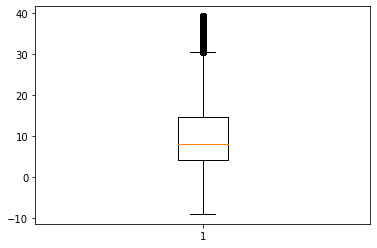

In [15]:
#PM 2.5	temp	pressure	humidity	wind_speed
plt.boxplot(variables["temp"])
plt.show()

In [16]:
print(variables['PM 2.5'].quantile(0.10))
print(variables['PM 2.5'].quantile(0.90))
print(variables['PM 2.5'].skew())

Q1 = variables['PM 2.5'].quantile(0.25)
Q3 = variables['PM 2.5'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['PM 2.5'] = np.where(variables['PM 2.5'] <Min, 1.5,variables['PM 2.5'])
variables['PM 2.5'] = np.where(variables['PM 2.5'] >Max, 19.2,variables['PM 2.5'])

print(variables['PM 2.5'].skew())


1.5
19.2
22.342565722379828
0.9523240134874773


In [17]:
print(variables['temp'].quantile(0.10))
print(variables['temp'].quantile(0.90))
print(variables['temp'].skew())

Q1 = variables['temp'].quantile(0.25)
Q3 = variables['temp'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['temp'] = np.where(variables['temp'] <Min, 1.09,variables['temp'])
variables['temp'] = np.where(variables['temp'] >Max, 21.01,variables['temp'])

print(variables['temp'].skew())


1.09
21.01
0.7389897638023412
0.5633978692251776


In [18]:
print(variables['pressure'].quantile(0.10))
print(variables['pressure'].quantile(0.90))
print(variables['pressure'].skew())

Q1 = variables['pressure'].quantile(0.25)
Q3 = variables['pressure'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['pressure'] = np.where(variables['pressure'] <Min, 1002.0,variables['pressure'])
variables['pressure'] = np.where(variables['pressure'] >Max, 1029.0,variables['pressure'])

print(variables['pressure'].skew())

1002.0
1029.0
-0.13263122309302894
-0.009654458323889399


In [19]:
print(variables['humidity'].quantile(0.10))
print(variables['humidity'].quantile(0.90))
print(variables['humidity'].skew())

Q1 = variables['humidity'].quantile(0.25)
Q3 = variables['humidity'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['humidity'] = np.where(variables['humidity'] <Min, 47.0,variables['humidity'])
variables['humidity'] = np.where(variables['humidity'] >Max, 94.0,variables['humidity'])

print(variables['humidity'].skew())

47.0
94.0
-0.796595696431913
-0.7146952998018503


In [20]:
print(variables['wind_speed'].quantile(0.10))
print(variables['wind_speed'].quantile(0.90))
print(variables['wind_speed'].skew())

Q1 = variables['wind_speed'].quantile(0.25)
Q3 = variables['wind_speed'].quantile(0.75)
IQR = Q3 - Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

variables['wind_speed'] = np.where(variables['wind_speed'] <Min, 1.03,variables['wind_speed'])
variables['wind_speed'] = np.where(variables['wind_speed'] >Max, 6.7,variables['wind_speed'])

print(variables['wind_speed'].skew())

1.03
6.7
1.1316723921929683
0.510329116277232


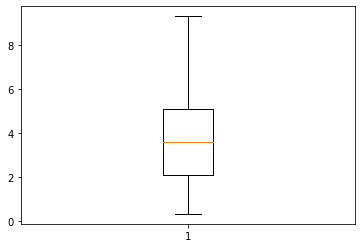

In [21]:
#PM 2.5	temp	pressure	humidity	wind_speed
plt.boxplot(variables["wind_speed"])
plt.show()

In [22]:
variables['Time_stamp']= variables['Time_stamp'].astype(str).astype('float64')
variables['Peak/NoPeak']= variables['Peak/NoPeak'].astype(str).astype('float64')

variables['boxName_s4']= variables['boxName_s4'].astype(str).astype('float64')
variables['boxName_nordsand']= variables['boxName_nordsand'].astype(str).astype('float64')
variables['boxName_ioki']= variables['boxName_ioki'].astype(str).astype('float64')
variables['boxName_iGude']= variables['boxName_iGude'].astype(str).astype('float64')
variables['boxName_Rothschildallee']= variables['boxName_Rothschildallee'].astype(str).astype('float64')
variables['boxName_MousonSense']= variables['boxName_MousonSense'].astype(str).astype('float64')
variables['boxName_Medienzentrum Frankfurt']= variables['boxName_Medienzentrum Frankfurt'].astype(str).astype('float64')
variables['boxName_Luftdaten.info [6703181]']= variables['boxName_Luftdaten.info [6703181]'].astype(str).astype('float64')
variables['boxName_Ginnheim_Dust_Light_Temp']= variables['boxName_Ginnheim_Dust_Light_Temp'].astype(str).astype('float64')
variables['boxName_Frankfurt_Riederwald']= variables['boxName_Frankfurt_Riederwald'].astype(str).astype('float64')
variables['boxName_FeinstaubFFM']= variables['boxName_FeinstaubFFM'].astype(str).astype('float64')
variables['boxName_FFM_Westend_Sued']= variables['boxName_FFM_Westend_Sued'].astype(str).astype('float64')
variables['boxName_Bernem']= variables['boxName_Bernem'].astype(str).astype('float64')

variables['Day_Wednesday']= variables['Day_Wednesday'].astype(str).astype('float64')
variables['Day_Tuesday']= variables['Day_Tuesday'].astype(str).astype('float64')
variables['Day_Thursday']= variables['Day_Thursday'].astype(str).astype('float64')
variables['Day_Sunday']= variables['Day_Sunday'].astype(str).astype('float64')
variables['Day_Saturday']= variables['Day_Saturday'].astype(str).astype('float64')
variables['Day_Monday']= variables['Day_Monday'].astype(str).astype('float64')

variables['Weather Description_light intensity shower rain']= variables['Weather Description_light intensity shower rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain + moderate rain + mist']= variables['Weather Description_light intensity drizzle rain + moderate rain + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain + moderate rain']= variables['Weather Description_light intensity drizzle rain + moderate rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain + mist']= variables['Weather Description_light intensity drizzle rain + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain + light rain + mist']= variables['Weather Description_light intensity drizzle rain + light rain + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain + light rain']= variables['Weather Description_light intensity drizzle rain + light rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle rain']= variables['Weather Description_light intensity drizzle rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle + moderate rain']= variables['Weather Description_light intensity drizzle + moderate rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle + mist']= variables['Weather Description_light intensity drizzle + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle + light snow + mist']= variables['Weather Description_light intensity drizzle + light snow + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle + light rain + mist']= variables['Weather Description_light intensity drizzle + light rain + mist'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle + light rain']= variables['Weather Description_light intensity drizzle + light rain'].astype(str).astype('float64')
variables['Weather Description_light intensity drizzle']= variables['Weather Description_light intensity drizzle'].astype(str).astype('float64')
variables['Weather Description_heavy intesity shower rain']= variables['Weather Description_heavy intesity shower rain'].astype(str).astype('float64')
variables['Weather Description_heavy intensity rain']= variables['Weather Description_heavy intensity rain'].astype(str).astype('float64')
variables['Weather Description_haze']= variables['Weather Description_haze'].astype(str).astype('float64')
variables['Weather Description_fog']= variables['Weather Description_fog'].astype(str).astype('float64')
variables['Weather Description_few clouds']= variables['Weather Description_few clouds'].astype(str).astype('float64')
variables['Weather Description_drizzle + moderate rain + mist']= variables['Weather Description_drizzle + moderate rain + mist'].astype(str).astype('float64')
variables['Weather Description_drizzle + mist']= variables['Weather Description_drizzle + mist'].astype(str).astype('float64')
variables['Weather Description_drizzle + light rain']= variables['Weather Description_drizzle + light rain'].astype(str).astype('float64')
variables['Weather Description_drizzle']= variables['Weather Description_drizzle'].astype(str).astype('float64')
variables['Weather Description_light snow + fog']= variables['Weather Description_light snow + fog'].astype(str).astype('float64')
variables['Weather Description_light snow']= variables['Weather Description_light snow'].astype(str).astype('float64')
variables['Weather Description_light shower snow']= variables['Weather Description_light shower snow'].astype(str).astype('float64')
variables['Weather Description_light rain and snow + mist']= variables['Weather Description_light rain and snow + mist'].astype(str).astype('float64')
variables['Weather Description_light rain and snow']= variables['Weather Description_light rain and snow'].astype(str).astype('float64')
variables['Weather Description_light rain + snow']= variables['Weather Description_light rain + snow'].astype(str).astype('float64')
variables['Weather Description_light rain + rain and snow']= variables['Weather Description_light rain + rain and snow'].astype(str).astype('float64')
variables['Weather Description_light rain + mist']= variables['Weather Description_light rain + mist'].astype(str).astype('float64')
variables['Weather Description_light rain + light snow']= variables['Weather Description_light rain + light snow'].astype(str).astype('float64')
variables['Weather Description_light rain + light rain and snow']= variables['Weather Description_light rain + light rain and snow'].astype(str).astype('float64')
variables['Weather Description_light rain + fog']= variables['Weather Description_light rain + fog'].astype(str).astype('float64')
variables['Weather Description_light rain']= variables['Weather Description_light rain'].astype(str).astype('float64')
variables['Weather Description_proximity thunderstorm + shower rain']= variables['Weather Description_proximity thunderstorm + shower rain'].astype(str).astype('float64')
variables['Weather Description_proximity thunderstorm + light intensity shower rain']= variables['Weather Description_proximity thunderstorm + light intensity shower rain'].astype(str).astype('float64')
variables['Weather Description_proximity thunderstorm']= variables['Weather Description_proximity thunderstorm'].astype(str).astype('float64')
variables['Weather Description_proximity shower rain']= variables['Weather Description_proximity shower rain'].astype(str).astype('float64')
variables['Weather Description_overcast clouds']= variables['Weather Description_overcast clouds'].astype(str).astype('float64')
variables['Weather Description_moderate rain + snow']= variables['Weather Description_moderate rain + snow'].astype(str).astype('float64')
variables['Weather Description_moderate rain + mist']= variables['Weather Description_moderate rain + mist'].astype(str).astype('float64')
variables['Weather Description_moderate rain']= variables['Weather Description_moderate rain'].astype(str).astype('float64')
variables['Weather Description_mist + fog']= variables['Weather Description_mist + fog'].astype(str).astype('float64')
variables['Weather Description_mist']= variables['Weather Description_mist'].astype(str).astype('float64')
variables['Weather Description_light snow + mist + fog']= variables['Weather Description_light snow + mist + fog'].astype(str).astype('float64')
variables['Weather Description_light snow + mist']= variables['Weather Description_light snow + mist'].astype(str).astype('float64')
variables['Weather Description_thunderstorm + heavy intesity shower rain']= variables['Weather Description_thunderstorm + heavy intesity shower rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm']= variables['Weather Description_thunderstorm'].astype(str).astype('float64')
variables['Weather Description_squalls']= variables['Weather Description_squalls'].astype(str).astype('float64')
variables['Weather Description_snow']= variables['Weather Description_snow'].astype(str).astype('float64')
variables['Weather Description_sky is clear']= variables['Weather Description_sky is clear'].astype(str).astype('float64')
variables['Weather Description_shower rain']= variables['Weather Description_shower rain'].astype(str).astype('float64')
variables['Weather Description_scattered clouds']= variables['Weather Description_scattered clouds'].astype(str).astype('float64')
variables['Weather Description_rain and snow']= variables['Weather Description_rain and snow'].astype(str).astype('float64')
variables['Weather Description_rain and drizzle + moderate rain + mist']= variables['Weather Description_rain and drizzle + moderate rain + mist'].astype(str).astype('float64')
variables['Weather Description_rain and drizzle + moderate rain']= variables['Weather Description_rain and drizzle + moderate rain'].astype(str).astype('float64')
variables['Weather Description_rain and drizzle + light rain']= variables['Weather Description_rain and drizzle + light rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with light rain']= variables['Weather Description_thunderstorm with light rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with heavy rain + moderate rain']= variables['Weather Description_thunderstorm with heavy rain + moderate rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with heavy rain + heavy intensity rain']= variables['Weather Description_thunderstorm with heavy rain + heavy intensity rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm + shower rain']= variables['Weather Description_thunderstorm + shower rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm + light intensity shower rain']= variables['Weather Description_thunderstorm + light intensity shower rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with light rain + moderate rain']= variables['Weather Description_thunderstorm with light rain + moderate rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with rain']= variables['Weather Description_thunderstorm with rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with rain + light rain']= variables['Weather Description_thunderstorm with rain + light rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with rain + moderate rain']= variables['Weather Description_thunderstorm with rain + moderate rain'].astype(str).astype('float64')
variables['Weather Description_thunderstorm with rain + squalls']= variables['Weather Description_thunderstorm with rain + squalls'].astype(str).astype('float64')

In [23]:
target = target.astype(str).astype('float64')
target.dtypes

dtype('float64')

In [24]:
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('ggplot')

col_names = list(variables[['Time_stamp', 'PM 2.5', 'temp', 'pressure', 'humidity', 'wind_speed']])
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(variables[['Time_stamp', 'PM 2.5', 'temp', 'pressure', 'humidity', 'wind_speed']])
df_mm = pd.DataFrame(df_mm, columns=col_names)

variables.drop(['Time_stamp'], axis = 1, inplace = True)
variables.drop(['PM 2.5'], axis = 1, inplace = True)
variables.drop(['temp'], axis = 1, inplace = True)
variables.drop(['pressure'], axis = 1, inplace = True)
variables.drop(['humidity'], axis = 1, inplace = True)
variables.drop(['wind_speed'], axis = 1, inplace = True)

variables = pd.concat( [df_mm, variables], axis = 1)

In [25]:
print(variables.shape)
print(target.shape)

(1230693, 93)
(1230693,)


In [26]:
variables.drop(variables.index[200001:1230693], inplace=True)
target.drop(target.index[200001:1230693], inplace=True)

In [27]:
print(variables.shape)
print(target.shape)

(200001, 93)
(200001,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(variables, target, test_size = 0.2, random_state = 0)

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(160000,)
(160000, 93)
(40001, 93)
(40001,)


In [29]:
import pickle
pickle_out = open("X_train_Numerical.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train_Numerical.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test_Numerical.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test_Numerical.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()